<h1> ANALYSIS OF THE VARIOUS GENRES OF MOVIES & TV SHOWS </h1>

<body style="background-color:powderblue;"> 
<h2 style="font-family:verdana;">  Introduction </h2>
<p> Since the pandemic, movies and TV shows have become a huge part of everyone's lives. Some common genres like Comedy, Action, and Romance were introduced the first in the Film Industry in the 19th century. Today we see a number of other unique genres dominating the Film Industry. But why is that these new genres have started to gain more popularity? The following assement will provide answers to a variety of questions and hypothesis. </p>
</body>

<h2> Data Source</h2>
<p> The data for this ananlysis is extracted from Kaggle. The particular dataset consisted of 5043 rows x 28 columns. Columns Genre, IMDB score, Director Facebook likes are some data points that have been used in this project. 
<br>
https://www.kaggle.com/carolzhangdc/imdb-5000-movie-dataset<br>

</p>


<h2> Data Cleaning </h2>
<p> Looking at the data, I realized there were some rows that were redunant. First, in order to solve this issue, I had to use the in-built function drop_duplicates() to remove the repetitive rows in the data set. Secondly, there were some rows with missing or empty cells. Columns like genres, title_year, imdb_score were some important columns needed for the analysis. As some cells/rows were missing for these columns, they were considered incomplete data. To remove these rows, I used the dropna() function. 
    
  </p>

<h2> Data Manipulation </h2>
    <p> As part of my analysis, I needed the list of all the genres, and how the genres were distrubuted throughout the years (19th century onwards). Hovering over the data, I realized that there were multiple genres for most of the movies. Therefore, I made two functions to solve this issue. 
     </p>
    

<h2> Data Exploration </h2>

In [1]:
#Imported the Python Libaries as required
import mplcursors
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import collections
import numpy as np
import matplotlib.cm as cm
import random
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm


In [2]:
#Reading CSV file and converting the data to a Dataframe
data = pd.read_csv("/Users/adyashamishra/Downloads/movie_metadata.csv")


In [3]:
#Cleaning the data.....

#Removing redunant/repetitive rows
data.drop_duplicates(inplace=True)
duplicate = data[data.duplicated()]
data.drop_duplicates(inplace=True)

#Removing rows with empty values per the columns required
data.dropna( subset= ['genres', 'duration', 'title_year', 'movie_title', 'imdb_score'], inplace= True)

In [4]:
#Test 1 - Data Exploration
new_list_dir=[]
dir_name= data.director_name.to_list()
imdb=data.imdb_score.to_list()
dir_fb_likes= data.director_facebook_likes.to_list()


In [5]:
#Making a list with Director names without repetition
new_list_dir.append(([item for item, count in collections.Counter(dir_name).items() if count > 1]))

In [6]:
#Test 2- Data Exploration

#Making Dataframe with only Documentary as the genre
df_documentary= data[data["genres"]=="Documentary"]

#Making a Dataframe using the above Dataframe with certain columns 
df_doc_subset_col= df_documentary[['director_name', 'duration', 'gross', 'country', 'title_year', 'imdb_score']]
subset_col= data[['director_name', 'duration', 'gross', 'country', 'title_year', 'imdb_score', "genres"]]
#print(subset_col)


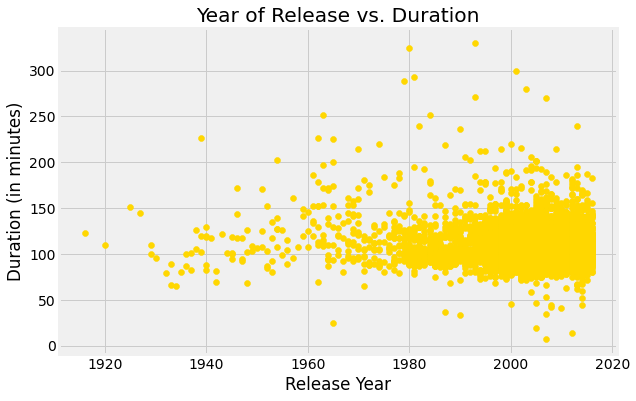

In [7]:

#Variable fig states the dimensions for the matplotlib graph    
fig = plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')

#Making a scatterplot by plotting title_year and duration for all rows
plt.scatter(subset_col["title_year"], subset_col["duration"], c= "gold")
plt.xlabel("Release Year")
plt.ylabel("Duration (in minutes)")
plt.title("Year of Release vs. Duration")
plt.show()


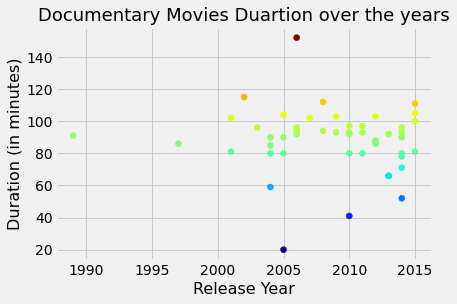

In [8]:

#Using matplotlib python library to make a scatter plot of documentary movies and their respective durations                             
plt.scatter(df_doc_subset_col["title_year"], df_doc_subset_col["duration"], c=df_doc_subset_col["duration"],cmap="jet")
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':90})
plt.xlabel("Release Year", size=16)
plt.ylabel("Duration (in minutes)", size=16)
plt.title("Documentary Movies Duartion over the years", size= 18)
plt.show()

In [9]:

genre= data.genres.to_list()
#print(genre)


In [10]:
#Making a list with all unique genres 
combined = '|'.join(genre)
genres_dup = combined.split('|')
#print(genres_dup)


all_genres=[]
all_genres.append(([item for item, count in collections.Counter(genres_dup).items() if count > 1]))
all_genres_final= all_genres[0]
all_genres_final.append('Rom-Com')
#print(all_genres_final)

In [11]:
#Duplicating data to have a copy of original data
data_1 = data

#Checking and noting if particular movie had 0which genre
def genre_finder(x):
    a= data_1.genres
    action_list=[]
    for i in a:
        if i.find(str(x))==-1:
            action_list.append(0)
        else:
            action_list.append(1)
    data_1[str(x)]= action_list
    return data_1

for i in all_genres_final:
    genre_finder(i)
#print(data_1) 



In [12]:
g= data_1.genres
romcom=[]
for i in g:
    if i.find('Romance')!=-1:
        if i.find('Comedy')!=-1:
            romcom.append(1)
        else:
            romcom.append(0)
    else:
        romcom.append(0)
data_1['Rom-Com']= romcom



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


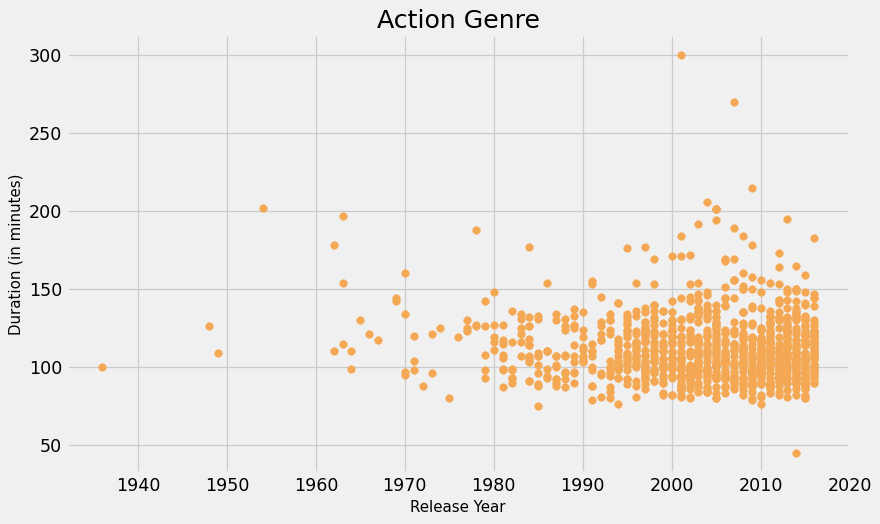

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


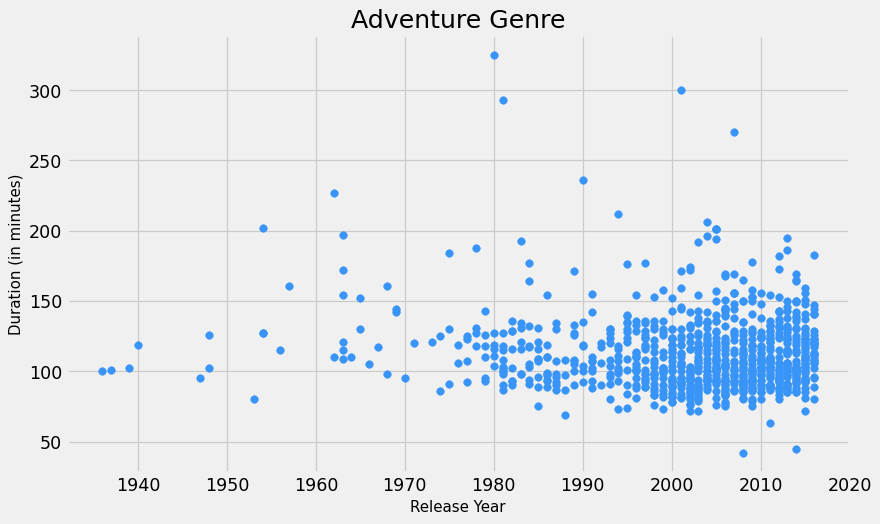

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


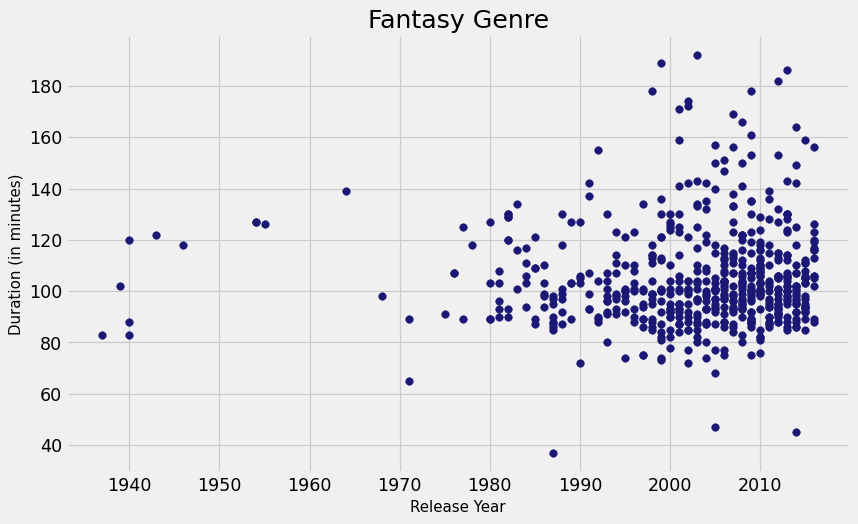

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


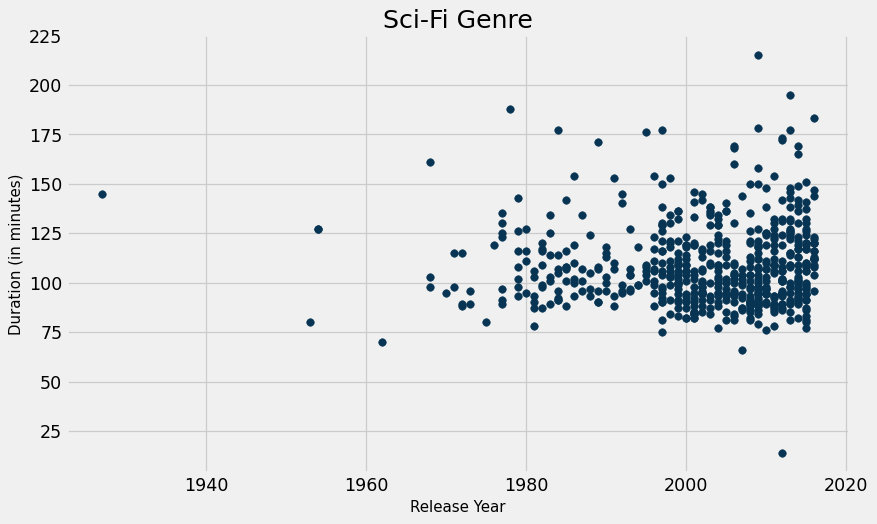

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


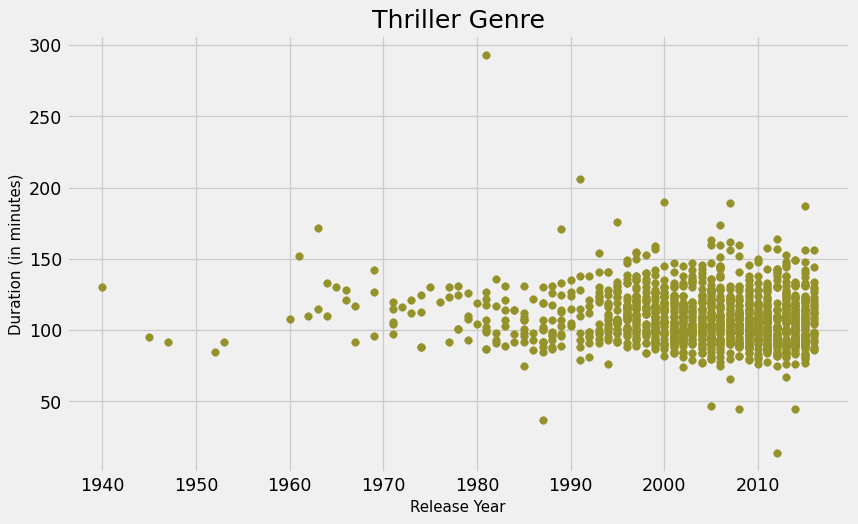

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


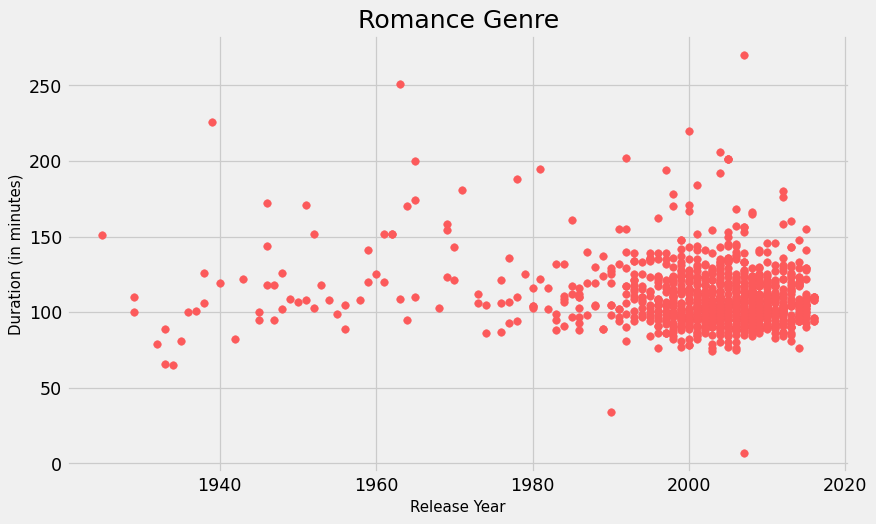

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


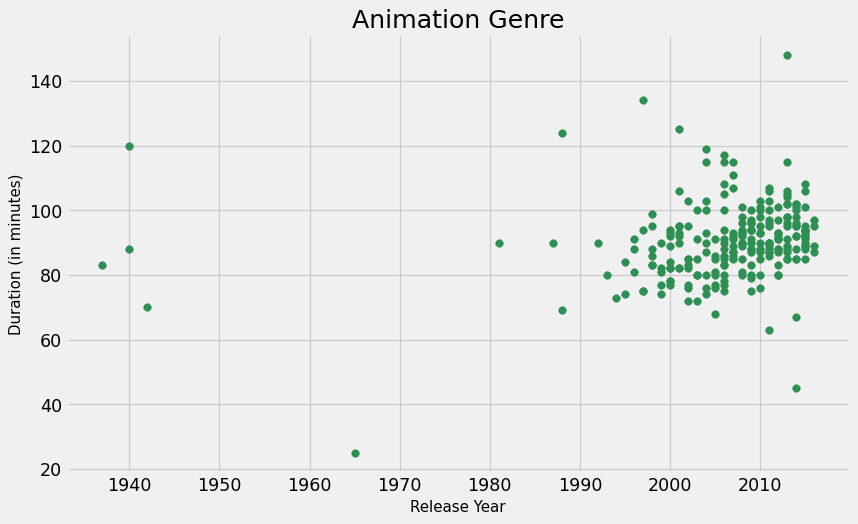

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


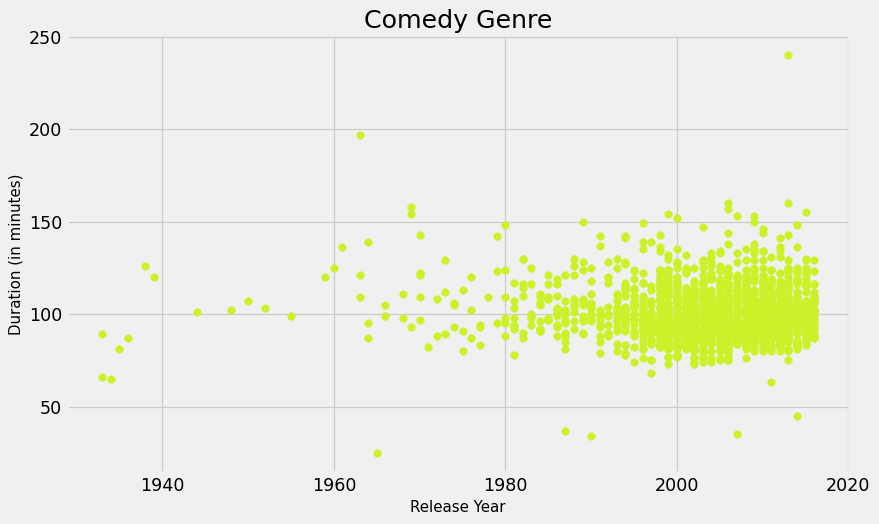

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


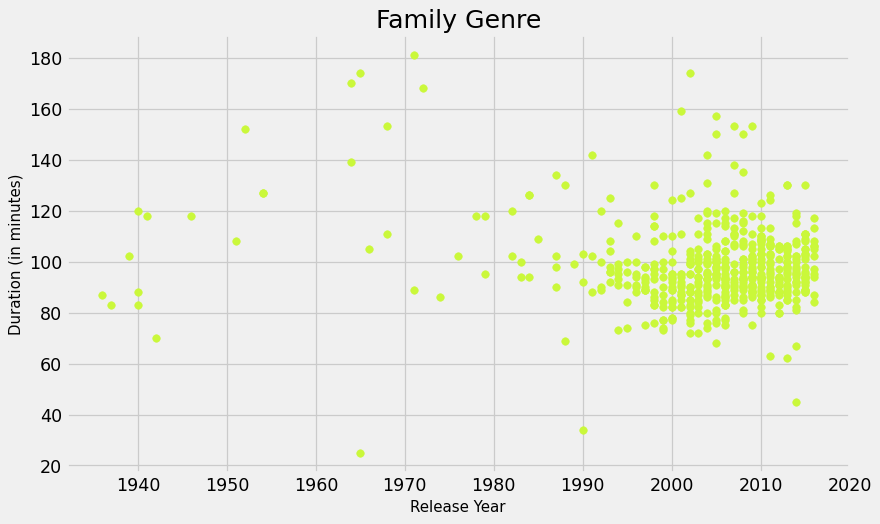

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


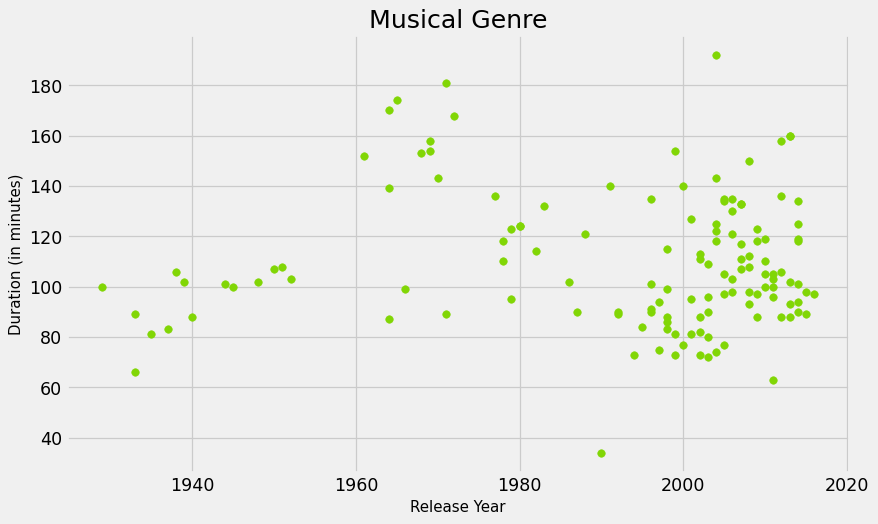

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


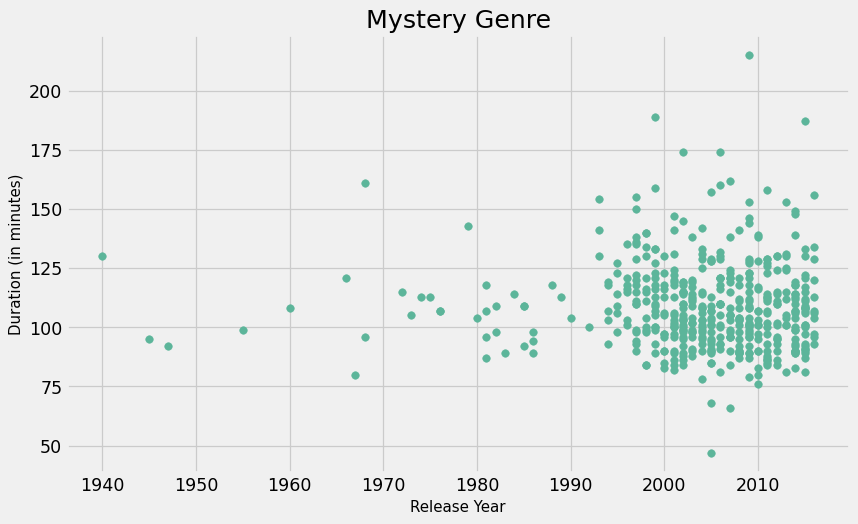

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


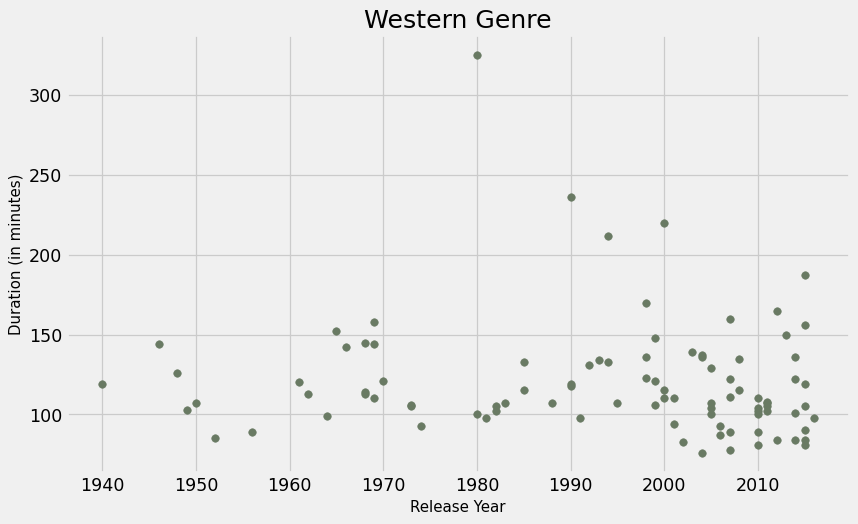

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


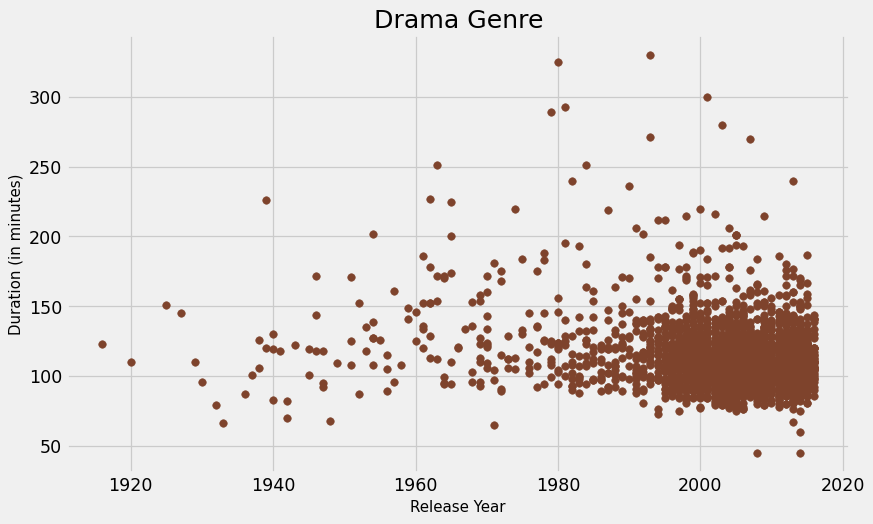

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


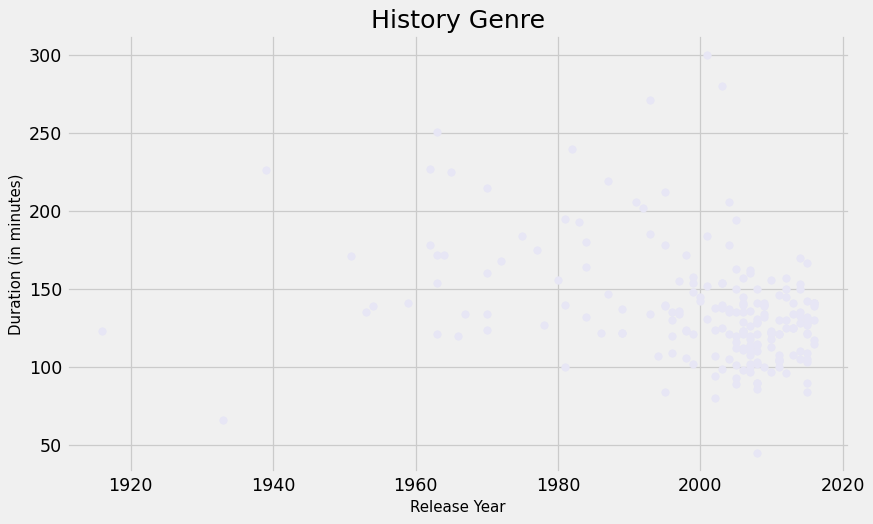

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


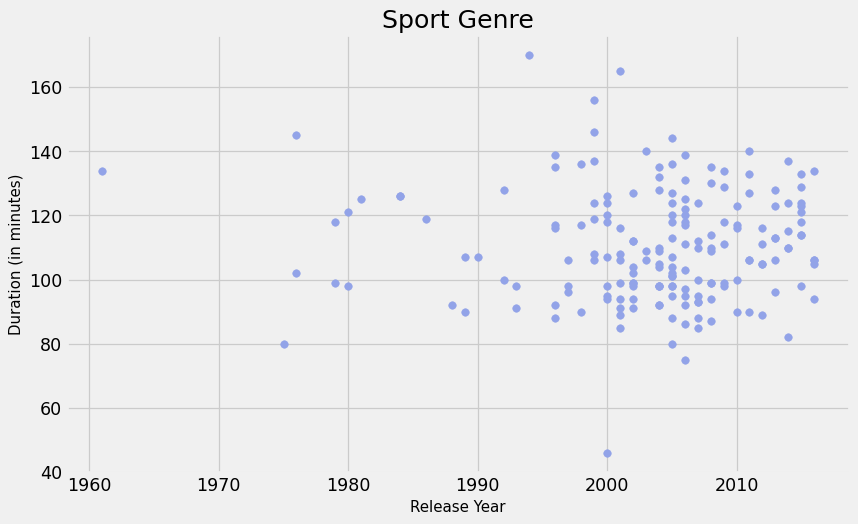

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


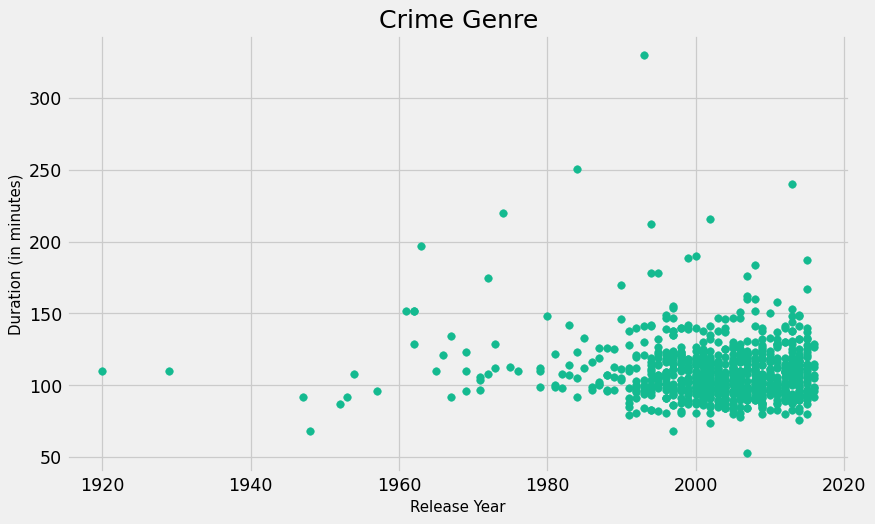

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


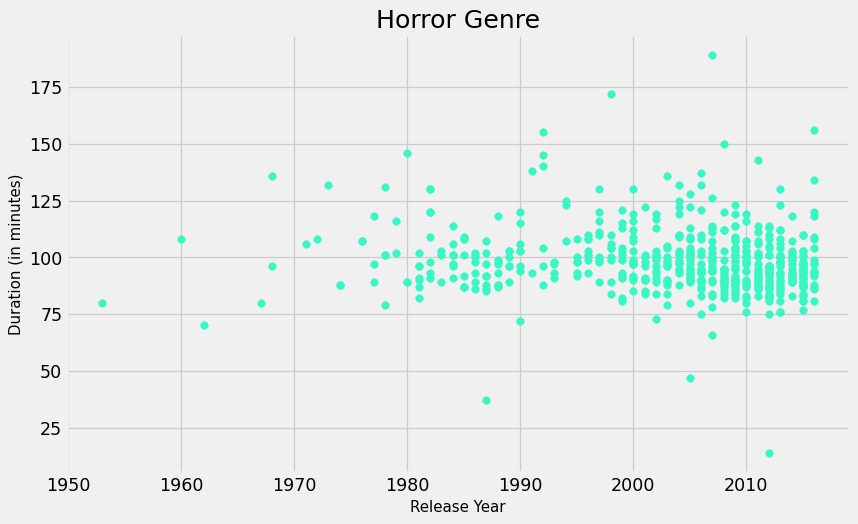

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


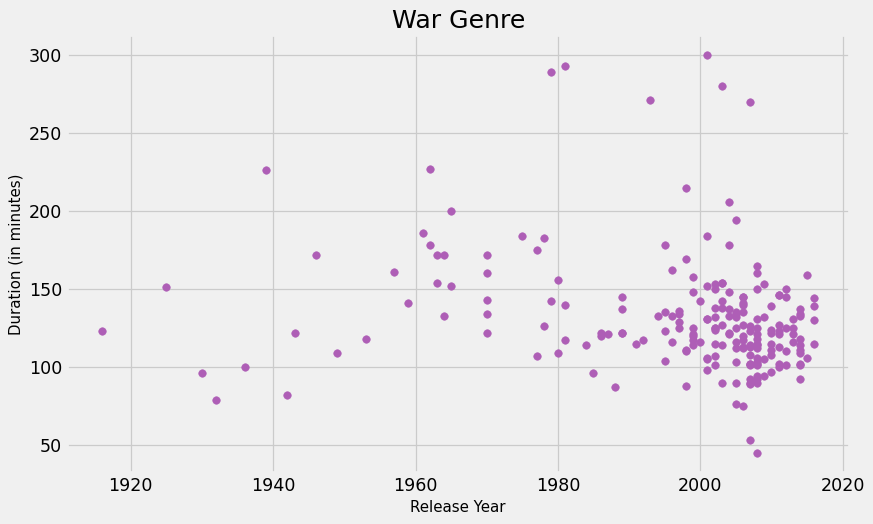

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


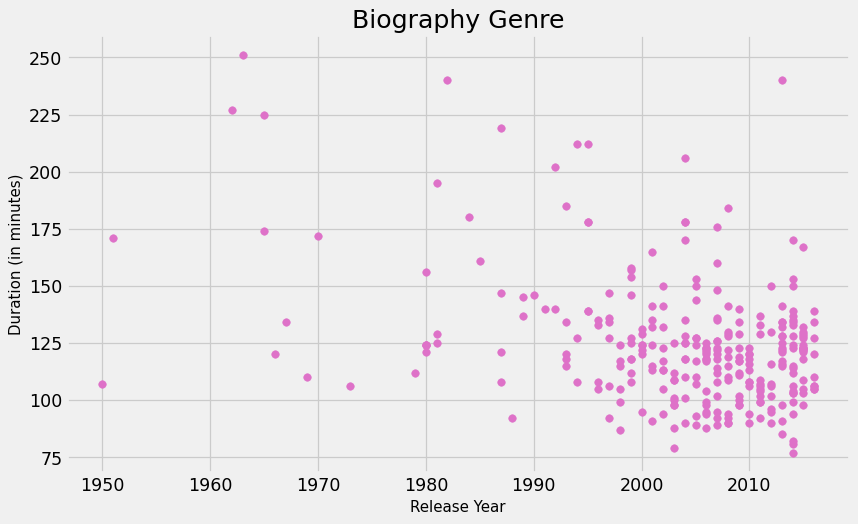

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


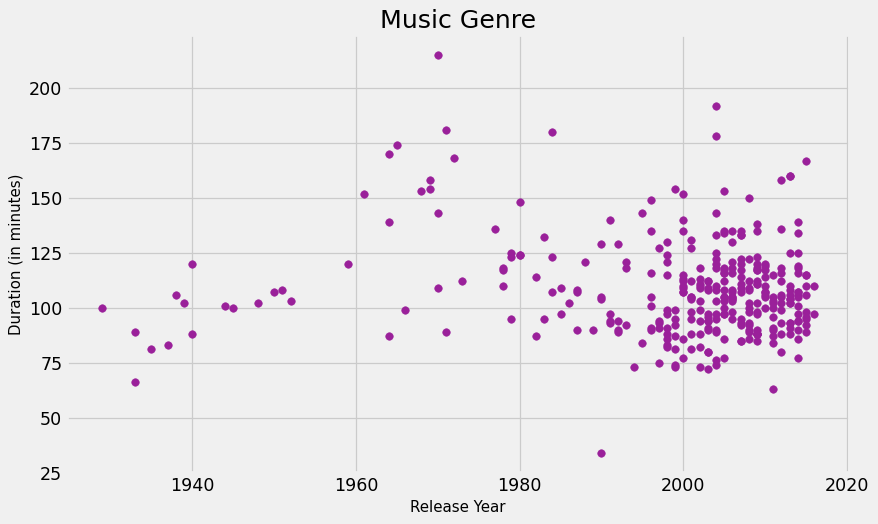

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


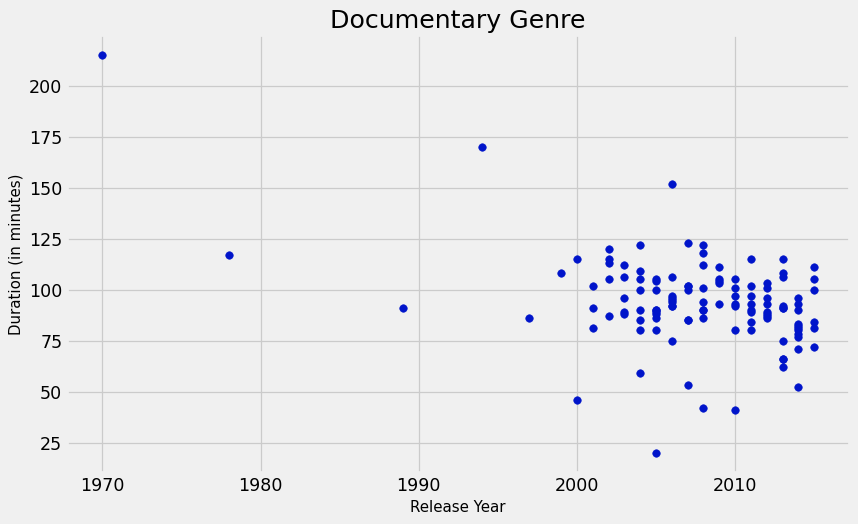

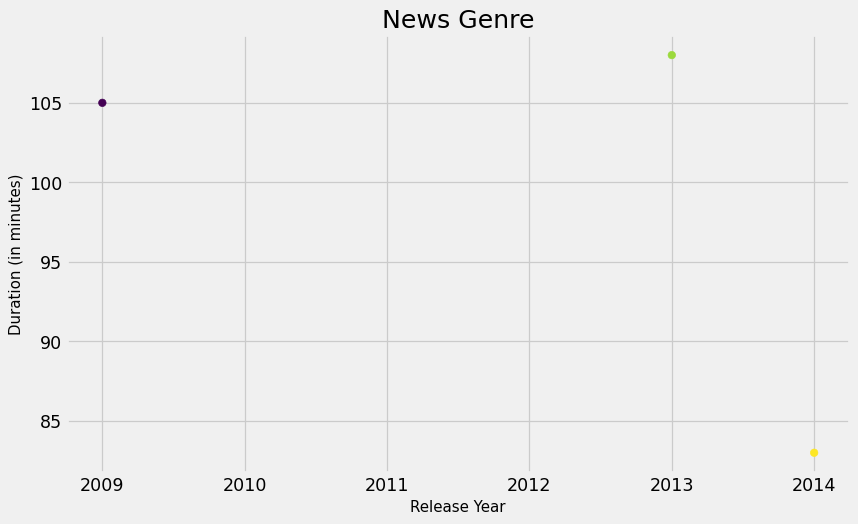

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


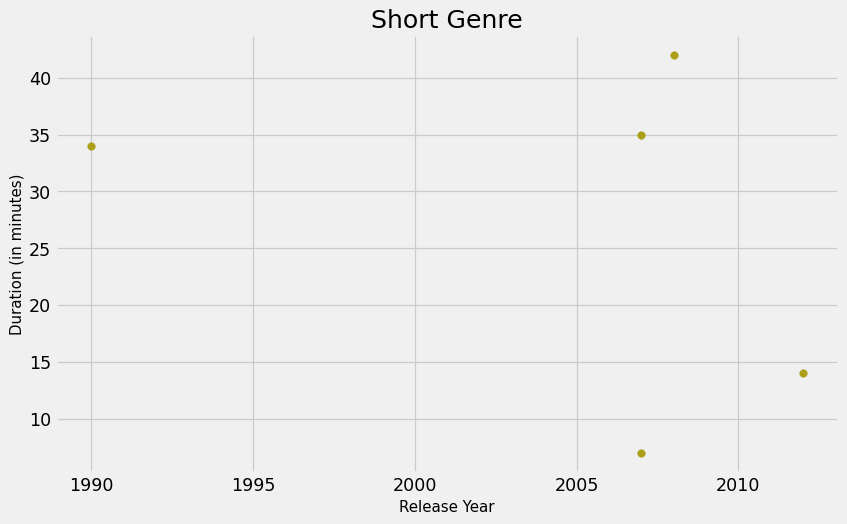

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


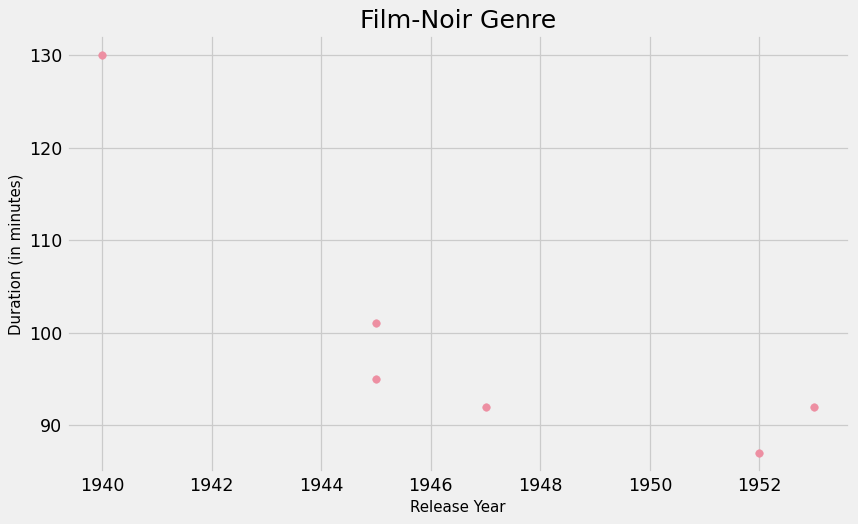

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


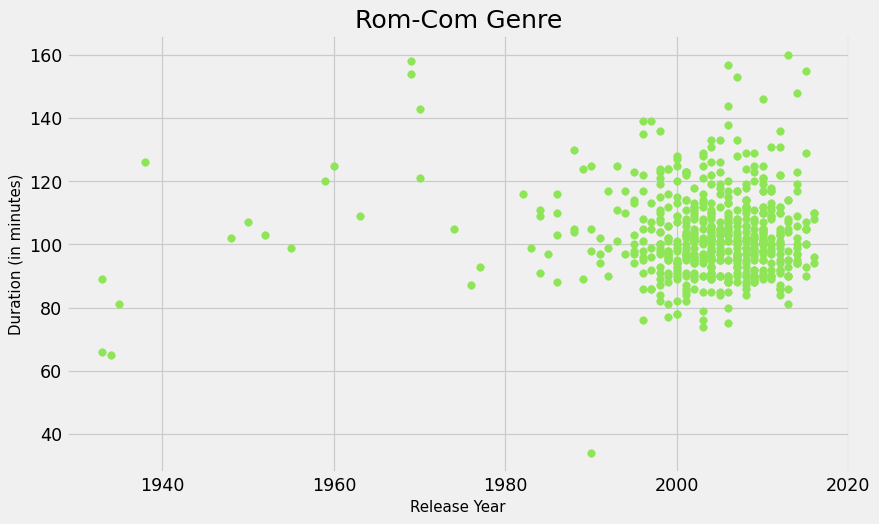

In [13]:
def genre_scatter(x):
    r= random.random()
    g= random.random()
    b= random.random()
    col= [r,g,b]
    fig = plt.figure(figsize=(10,6))
    a= x.strip("")
    action= data_1.loc[data_1[a]==1]
    x = action["title_year"]
    y = action["duration"]
    plt.scatter(x, y, c= col)
    plt.xlabel("Release Year",  size = 12)
    plt.ylabel("Duration (in minutes)",  size = 12)
    plt.title( str(a) + " Genre")
    plt.show()

for i in all_genres_final:
    genre_scatter(i)
plt.show()
       

    

In [14]:
def pdf_maker(x):
    r= random.random()
    g= random.random()
    b= random.random()
    col= [r,g,b]
    fig = plt.figure(figsize=(10,6))
    a= x.strip("")
    action= data_1.loc[data_1[a]==1]
    x = action["title_year"]
    y = action["duration"]
    plt.scatter(x, y, c= col)
    plt.xlabel("Release Year",  size = 12)
    plt.ylabel("Duration (in minutes)",  size = 12)
    plt.title( str(a) + " Genre")
    name = str(a) + ".pdf"
    plt.savefig(name)
    plt.show()
    
    

In [15]:
#pdf_maker("Comedy")
#pdf_maker("Rom-Com")
#pdf_maker("Romance")

In [16]:
num_critic_reviews= data_1['num_critic_for_reviews']

print(data)

      color      director_name  num_critic_for_reviews  duration  \
0     Color      James Cameron                   723.0     178.0   
1     Color     Gore Verbinski                   302.0     169.0   
2     Color         Sam Mendes                   602.0     148.0   
3     Color  Christopher Nolan                   813.0     164.0   
5     Color     Andrew Stanton                   462.0     132.0   
...     ...                ...                     ...       ...   
5037  Color       Edward Burns                    14.0      95.0   
5038  Color        Scott Smith                     1.0      87.0   
5040  Color   Benjamin Roberds                    13.0      76.0   
5041  Color        Daniel Hsia                    14.0     100.0   
5042  Color           Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes        actor_2_name  \
0                         0.0                   855.0    Joel David Moore   
1                       563.0

<h2> Observations </h2>

<h2> Hypothesis 1 </h2>
<p> Do Critics reviews movies where famous Actors or Directors are present? </p>


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


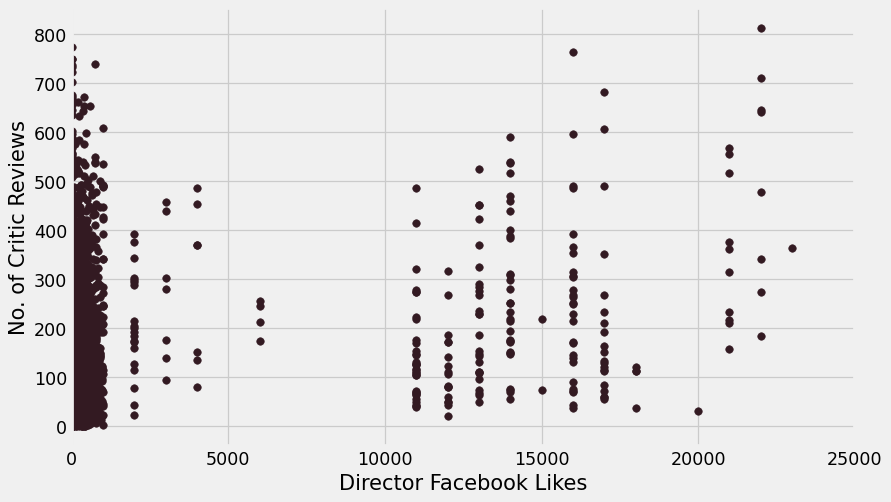

In [17]:
#Generating random colors 
r= random.random()
g= random.random()
b= random.random()
col= [r,g,b]

#Number of Critic Reviews VS Director Facebook Likes
plt.scatter(data['director_facebook_likes'],data['num_critic_for_reviews'], c=col)
plt.xlabel('Director Facebook Likes')
plt.ylabel('No. of Critic Reviews')
plt.xlim([0, 25000])
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


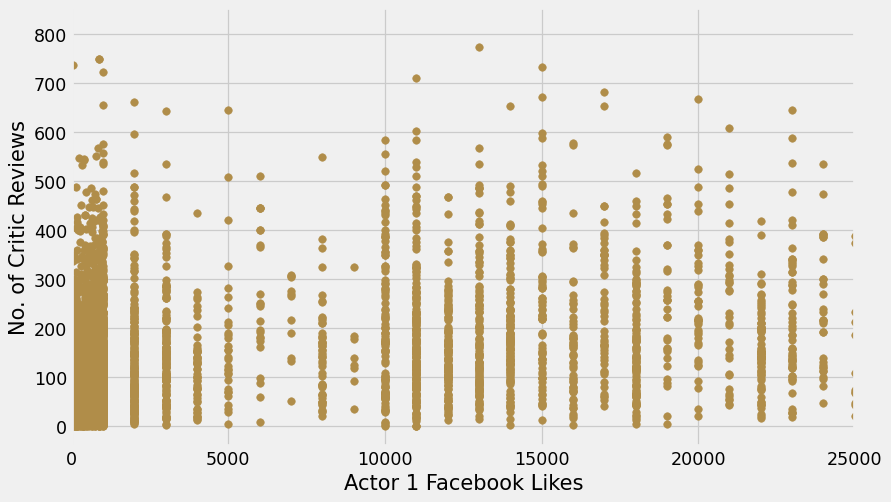

In [18]:
#Generating random colors 
r= random.random()
g= random.random()
b= random.random()
col= [r,g,b]

#Number of Critic Reviews VS Actor 1 Facebook Likes
plt.scatter(data['actor_1_facebook_likes'],data['num_critic_for_reviews'], c=col)
plt.xlabel('Actor 1 Facebook Likes')
plt.ylabel('No. of Critic Reviews')
plt.xlim([0, 25000])
plt.show() 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


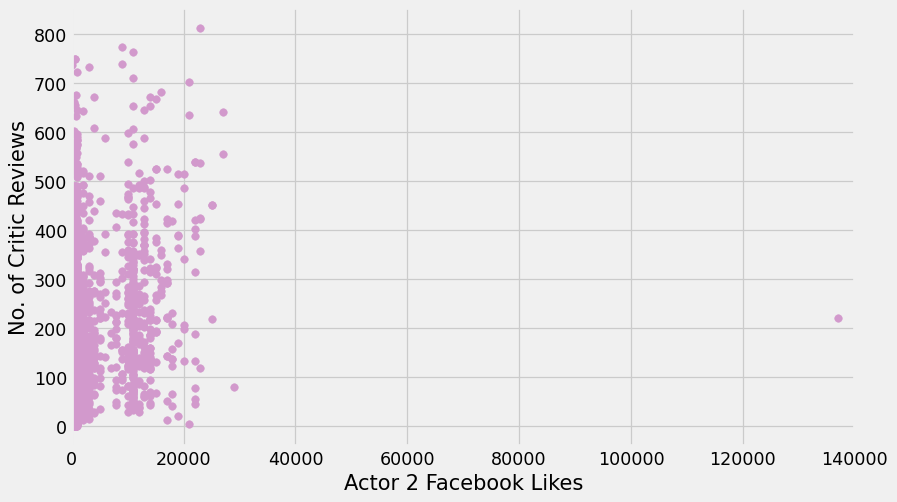

In [19]:
#Generating random colors 
r= random.random()
g= random.random()
b= random.random()
col= [r,g,b]

#Number of Critic Reviews VS Actor 2 Facebook Likes
plt.scatter(data['actor_2_facebook_likes'],data['num_critic_for_reviews'], c=col)
plt.xlabel('Actor 2 Facebook Likes')
plt.ylabel('No. of Critic Reviews')
plt.xlim([0, 140000])
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


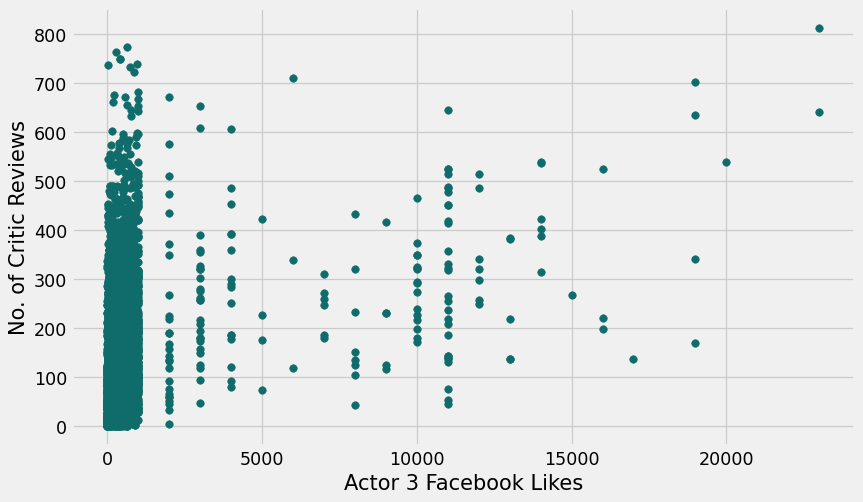

In [20]:
#Generating random colors 
r= random.random()
g= random.random()
b= random.random()
col= [r,g,b]

#Number of Critic Reviews VS Actor 3 Facebook Likes
plt.scatter(data['actor_3_facebook_likes'],data['num_critic_for_reviews'], c=col)
plt.xlabel('Actor 3 Facebook Likes')
plt.ylabel('No. of Critic Reviews')
#plt.xlim([0, 25000])
plt.show()   


<p> When we look at the correlations, we notice that all of them have a positive correlation with Number of Critic Reviews. This means that as the Facebook Likes increase for Directors and Actors, the number of critic reviews also increases. Actor 2 Facebook Likes and Number of Critic Reviews have the highest positive correlation. We also notice that Director Facebook Likes has the lowest positive correlation compared to the other parameters. Hence, we can infer that actors have a slightly higher impact on the Number of Critic Reviews. 
   </p>
   

In [21]:
#Correlation between Number of Critic Reviews and Director Facebook Likes
data['num_critic_for_reviews'].corr(data['director_facebook_likes'])

0.1809853208411101

In [22]:
#Correlation between Number of Critic Reviews and Actor 1 Facebook Likes
data['num_critic_for_reviews'].corr(data['actor_1_facebook_likes'])

0.18512879929256318

In [23]:
#Correlation between Number of Critic Reviews and Actor 2 Facebook Likes
data['num_critic_for_reviews'].corr(data['actor_2_facebook_likes'])

0.27775354471575053

In [24]:
#Correlation between Number of Critic Reviews and Actor 3 Facebook Likes
data['num_critic_for_reviews'].corr(data['actor_3_facebook_likes'])

0.26469919716852003

<h3> Linear Regression </h3>

In [25]:
x=data[['director_facebook_likes','actor_1_facebook_likes','actor_2_facebook_likes', 'actor_3_facebook_likes'] ]
y= data[['num_critic_for_reviews']]
np.isnan(x)
np.where(np.isnan(x))
np.nan_to_num(x)

regress= LinearRegression()
regress.fit(x,y)
plt.scatter(x, y, color = 'yellow')
plt.plot(x,y , color = 'pink')
plt.title('No of critic reviews vs Facevbook Likes')
plt.xlabel('Director FB likes')
plt.ylabel('Critic Reviews')
plt.show()


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [27]:
A= data['num_critic_for_reviews']
B= data['director_facebook_likes']
C= data['actor_1_facebook_likes']
D= data['actor_2_facebook_likes']
E= data['actor_3_facebook_likes']

res = sm.ols(formula="A ~ B + C + D + E", data=data).fit()
print(res.params)


print(res.summary())

Intercept    120.041204
B              0.005897
C              0.000624
D              0.004464
E              0.010547
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                      A   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     163.7
Date:                Mon, 05 Jul 2021   Prob (F-statistic):          1.42e-131
Time:                        18:58:22   Log-Likelihood:                -29702.
No. Observations:                4826   AIC:                         5.941e+04
Df Residuals:                    4821   BIC:                         5.945e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.9

In [29]:
y= data['num_critic_for_reviews'].values
x= data['director_facebook_likes','actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes'].values.reshape((-1,1))
#C= data['actor_1_facebook_likes'].values
#D= data['actor_2_facebook_likes'].values
#E= data['actor_3_facebook_likes'].values


reg= LinearRegression()
model= ols.fit(x,y)
response= model.predict(x)

r2=model.score(x,y)



KeyError: ('director_facebook_likes', 'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes')

<h2> 
Analysis Methodology 
</h2>

<h2> Inference </h2>

<h2> Summary </h2>